# Исследование массовых спектров RGA
На лабараторном практикуме была выполнена следующая работа.
## Цель
* Исследовать состав атмосферного воздуха
* Детектировать
                   1.Напущенные Неон
                   2.Напущенный Гелий
* Рассмотреть процесс релаксации после напуска
## Оборудобавние
Турбомолекулярный насос HI CUBE 80 ECO TURBO, манометр Пирани, источник тока, вакуумные соединения (трубки, о-ринги, фланцы, зажимы, переходники, краны), исследуемый газ в вакуумной резине, капилляр, масс-спектрометр SRS RGA 200, Software RGA.


## Описание установки.
Была собрана установка, включающая:
* Вакуумный насос HI CUBE 80 ECO TURBO, необходимый для поддержания низкого давления, необходимого для работы масс-спектрометра.
* Вакууметр Пирани для котроля давления
* Масс-спектрометр SRS RGA 200, подключенный к ПК
<img src="https://i.ibb.co/x3jDqwy/setting.jpg" alt="setting" border="0">

## Ход измерений
1. При выключенном спектрометре был откачен объём до рабочего давления $10^{-1}\, mbar$.
2. После включения спектрометра данные отображются на ПК с помощью Software RGA.
3. Был сохранён спектр в текстовом файле в формате 'Парциальное давление:атомная масса'.
4. После этого через капилляр был произведён напуск газа, предположительно с большй концентрацией Неона, после чего был вновь снят и записан спектр в файл.
5. Тоже, что и в п.4 только с двумя объёмами с Гелием.
6. После напуска Гелия был произведён замер динамики давлений азота, гелия и водорода с помощью того же программного обеспечения.
## Результаты
После провдеения эксперимента имеем набор данных от каждого измерения.
Данными являются файлы со спектром газа для всех этапов эксперимента.
[DATA](https://mega.nz/#F!U6Z2gQhL!qnC4vXSB2P2a4R79gHa6Ig)
### Обработка данных
Обработка данных произведена с помощью Python, код и результаты представлены ниже.

In [2]:
#Преамбула
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib notebook

#### Извлечение данных
Данные по каждому измерению получаются прямым считыванием файла.

Формат: ('массив масс', 'массив парциальных давлений')

In [3]:
#чистый воздух
data_0 = np.transpose(np.loadtxt(r"C:\Users\maxkway\Desktop\Labaratory\Massspectrum\data\Normal_air_nakonez.txt",
                                 delimiter= '\t',skiprows=20))

#Напущен Неон
data_neon = np.transpose(np.loadtxt(r"C:\Users\maxkway\Desktop\Labaratory\Massspectrum\data\Spise_neon.txt", 
                                    delimiter= '\t',skiprows=20))

#Напущен Гелий
data_helium_0 = np.transpose(np.loadtxt(r"C:\Users\maxkway\Desktop\Labaratory\Massspectrum\data\unfortuneli_noheliy.txt", 
                                        delimiter= '\t',skiprows=20))
#Напущен Гелий(перезапись)
data_helium_1 = np.transpose(np.loadtxt(r"C:\Users\maxkway\Desktop\Labaratory\Massspectrum\data\Helium_start1354.txt", 
                                        delimiter= '\t',skiprows=20))
#Напущен Гелий(перезапись)
data_helium_2 = np.transpose(np.loadtxt(r"C:\Users\maxkway\Desktop\Labaratory\Massspectrum\data\helium_midle_1356.txt",
                                        delimiter= '\t',skiprows=20))

#### Представление и анализ данных измерения начального воздуха
Ниже отображено зависимость парциального давления в объёме в зависимости от Атомной массы.
Метками отмечены интересующие нас массы, соответсвующие элементам в <a href="https://ru.wikipedia.org/wiki/%D0%92%D0%BE%D0%B7%D0%B4%D1%83%D1%85">атмосфере</a>.
Так же проведена ассоциация между атомными массами и предпологаемыми соединениями.


<IPython.core.display.Javascript object>


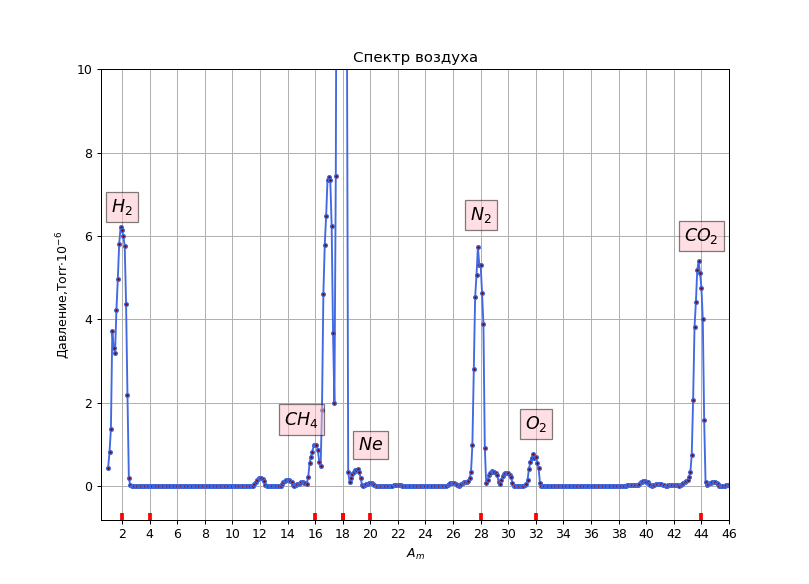

In [137]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_0[0],data_0[1]*1e06, linestyle = "-",     marker = ".", color = 'royalblue', markerfacecolor = "maroon")

plt.title('Спектр воздуха')
plt.ylabel(r'Давление,Torr$\cdot 10^{-6}$')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([0.5,46])
ax.set_ylim([-0.8,10])

ax.grid()


# Текст в рамке
plt.text(28, 6.5, r'$N_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(44, 6, r'$CO_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(32, 1.5, r'$O_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(20, 1, r'$Ne$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(15, 1.6, r'$CH_4$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(2, 6.7, r'$H_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
fig.set_size_inches(9, 6.5)
fig.savefig('air_0.pdf', dpi=300)

<IPython.core.display.Javascript object>


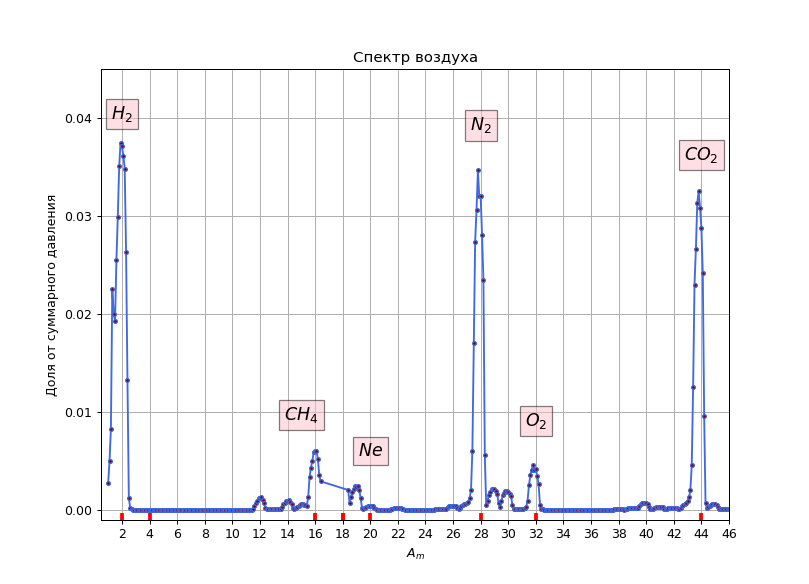

In [10]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_0[0],data_0[1]/np.sum(data_0[1]), linestyle = "-",  marker = ".", color = 'royalblue', markerfacecolor = "maroon")

plt.title('Спектр воздуха')
plt.ylabel(r'Доля от суммарного давления')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([0.5,46])
ax.set_ylim([-0.001,0.045])



# Текст в рамке
plt.text(28, 6.5/np.sum(data_0[1])*1e-06, r'$N_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(44, 6/np.sum(data_0[1])*1e-06, r'$CO_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(32, 1.5/np.sum(data_0[1])*1e-06, r'$O_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(20, 1/np.sum(data_0[1])*1e-06, r'$Ne$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(15, 1.6/np.sum(data_0[1])*1e-06, r'$CH_4$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(2, 6.7/np.sum(data_0[1])*1e-06, r'$H_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
fig.set_size_inches(9, 6.5)
ax.grid()
fig.savefig('air_0_part.pdf', dpi=300)

#### Некоторые комментарии по полученным данным.
* Замечено нетипичноее соотношение пиков: большой пик водорода и углекислого газа
* Проблемы:
    1. Вследствие диссоциации молекулы $СO_2$ появились дополнительные пики. 
    2.  Массе  28 отвечают сразу два иона $СО^+$, $N_2^{+}$. Поэтому  точный состав может дать только независимый анализ методами эмиссионной или термодесорбционной спектроскопии, которые позволяют разрешить эти соединения.

#### Разбор позиций:
|Масса | Соединение | Возможная причина появления и отсутствия|
|:---------------:|:---------------|:---------------:|
|2| $H_2^+$ | Величина пика обусловлена десорбацией и разложением водородосодержащих соединений |
|4| $He^+$ | Обычно регистрируется вследствии высокой газопроницаемостью через стекло|
|15, 16| $CH_4^+$, $CH_3^+$ | Метан, возможно из-за маслянных загрязнений |
|17, 18| $H_2O^+$, $OH^+$ |Пары воды в следствии отсутсвие отжига и азотных ловушек |
|28| $N_2^+$, $CO^+$ | Атомные массы совпадают, исследовать можно, сравнивая пики 12, 16, 32 |
|44| $CO_2^+$ | Постоянно присутствует в высоковакуумных системах |

### Обработка и представление данных после напуска Неона
Предварительно нормируются по суммарному давлению спектры до и после напуска
(из всех спектров убраны пары воды, т.к. они интереса не представляют),
после чего строится исходный спектр и новый. 
Из картинки ниже видно, что никакого ощутимого увелечения доли неона не произошло.

<IPython.core.display.Javascript object>


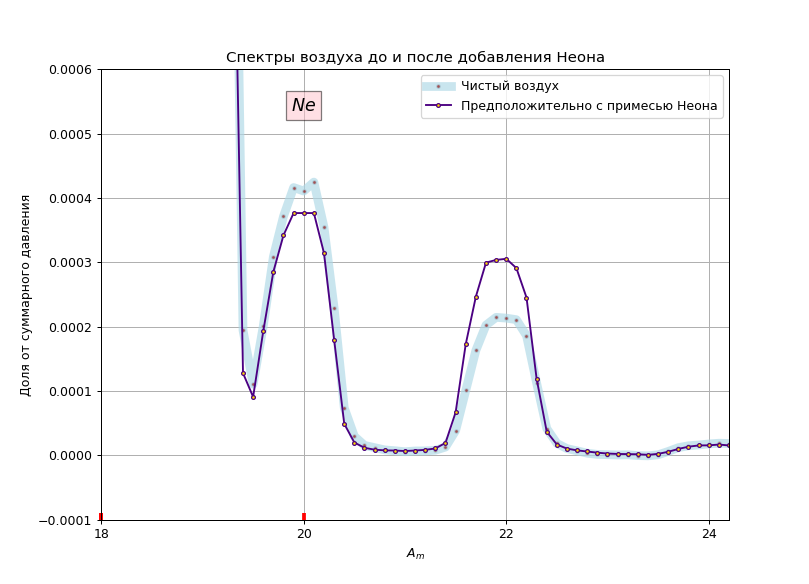

In [11]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_0[0],data_0[1]/np.sum(data_0[1]), 
        linestyle = "-",     marker = ".", color = 'lightblue', markerfacecolor = "darkred", 
        linewidth=7, alpha=0.65, label='Чистый воздух')
ax.plot(data_neon[0],data_neon[1]/np.sum(data_neon[1]),
        linestyle = "-",     marker = ".", color = 'indigo', markerfacecolor = "gold", label='Предположительно с примесью Неона')

plt.title('Спектры воздуха до и после добавления Неона')
plt.ylabel(r'Доля от суммарного давления')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([18,24.2])
ax.set_ylim([-0.0001,0.0006])

ax.grid()


# Текст в рамке

plt.text(20, 0.09*1/np.sum(data_0[1])*1e-06, r'$Ne$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))

plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('neon.pdf', dpi=300)

#### Обработка и представление данных после напуска Гелия из 1 сосуда
На рисунке ниже представлен весь спектр, из которого можно видеть резкое увеличение концентрации кислорода

<IPython.core.display.Javascript object>


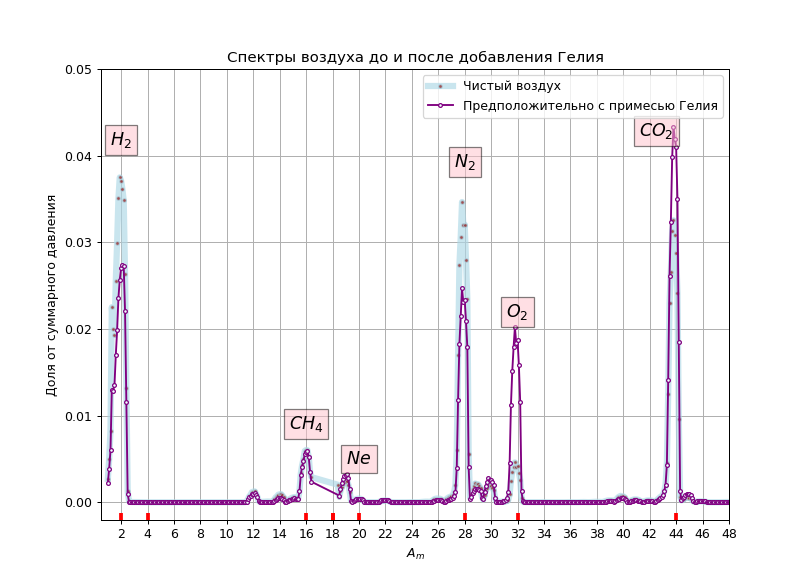

In [251]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_0[0],data_0[1]/np.sum(data_0[1]), 
        linestyle = "-",     marker = ".", color = 'lightblue', markerfacecolor = "darkred", 
        linewidth=5, alpha=0.65, label='Чистый воздух')
ax.plot(data_helium_0[0],data_helium_0[1]/np.sum(data_helium_0[1]),
        linestyle = "-",     marker = ".", color = 'purple', markerfacecolor = "azure", 
        label='Предположительно с примесью Гелия')

plt.title('Спектры воздуха до и после добавления Гелия')
plt.ylabel(r'Доля от суммарного давления')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([0.5, 48])
ax.set_ylim([-0.002,0.05])

ax.grid()


# Текст в рамке
plt.text(28, 6.5/np.sum(data_0[1])*1e-06, r'$N_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(42.5,0.0429 , r'$CO_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(32, 0.022, r'$O_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(20, 0.005 , r'$Ne$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(16, 0.009, r'$CH_4$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(2, 2.1*6.7/np.sum(data_helium_0[1])*1e-06, r'$H_2$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('heliim_0_view.pdf', dpi=300)

##### На графике ниже представлено сравнение давления гелия до и после первого напуска.
Опять же видно, что никакого видимого увеличения концентрации гелия не произошло


<IPython.core.display.Javascript object>


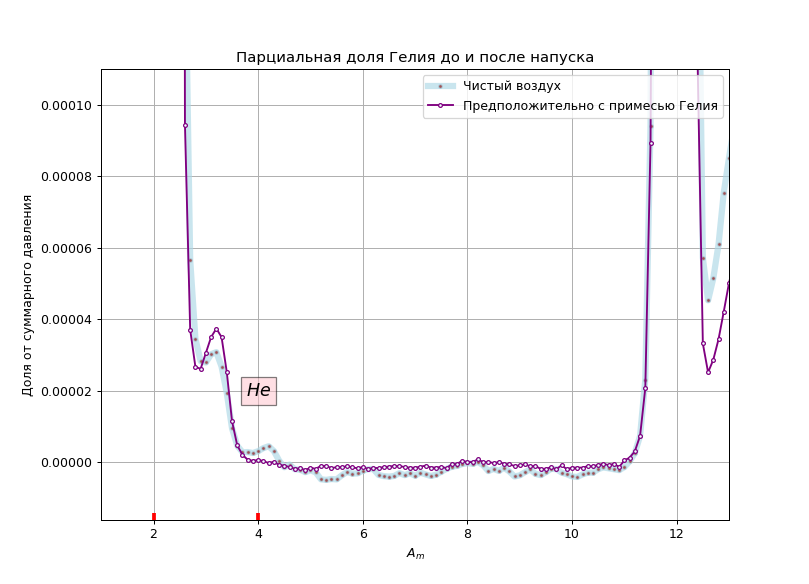

In [254]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_0[0],data_0[1]/np.sum(data_0[1]), 
        linestyle = "-",     marker = ".", color = 'lightblue', markerfacecolor = "darkred", 
        linewidth=5, alpha=0.65, label='Чистый воздух')
ax.plot(data_helium_0[0],data_helium_0[1]/np.sum(data_helium_0[1]),
        linestyle = "-",     marker = ".", color = 'purple', markerfacecolor = "azure", 
        label='Предположительно с примесью Гелия')

plt.title('Парциальная доля Гелия до и после напуска')
plt.ylabel(r'Доля от суммарного давления')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([1, 13])
ax.set_ylim([-1.6e-05,0.00011])

ax.grid()


# Текст в рамке

plt.text(4, 0.00002, r'$He$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))

plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('heliim_0.pdf', dpi=300)

#### Обработка данных от второго напуска гелия

<IPython.core.display.Javascript object>


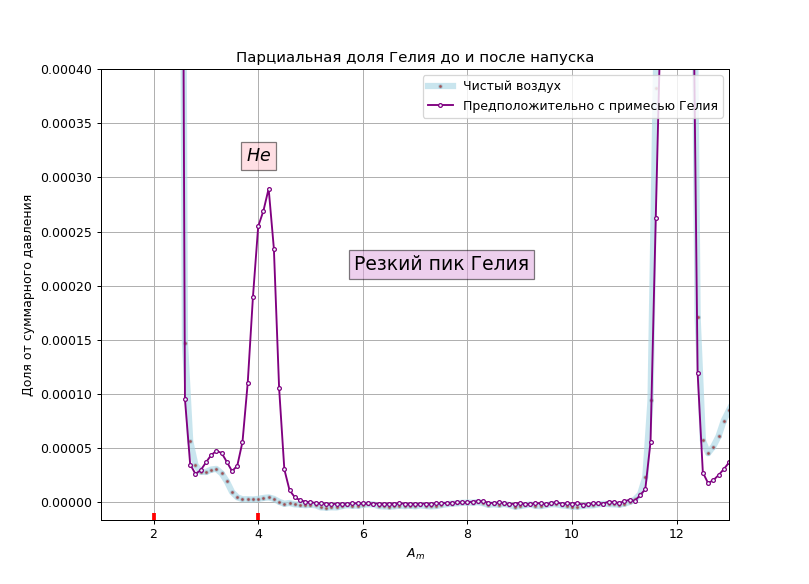

In [261]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_0[0], data_0[1] / np.sum(data_0[1]), 
        linestyle = "-",     marker = ".", color = 'lightblue', markerfacecolor = "darkred", 
        linewidth=5, alpha=0.65, label='Чистый воздух')
ax.plot(data_helium_1[0], data_helium_1[1] / np.sum(data_helium_1[1]),
        linestyle = "-",     marker = ".", color = 'purple', markerfacecolor = "azure", 
        label='Предположительно с примесью Гелия')

plt.title('Парциальная доля Гелия до и после напуска')
plt.ylabel(r'Доля от суммарного давления')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([1, 13])
ax.set_ylim([-1.6e-05,0.0004])

ax.grid()


# Текст в рамке

plt.text(4, 0.00032, r'$He$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))
plt.text(7.5, 0.00022, r'Резкий пик Гелия', fontsize=15,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='plum', alpha=0.5))

plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('heliim_0.pdf', dpi=300)

#### Так же был произведён замер через 2 минуты, его отображение представлено ниже.
Падение доли может быть с сорбцией гелия на стенках сосуда.

<IPython.core.display.Javascript object>


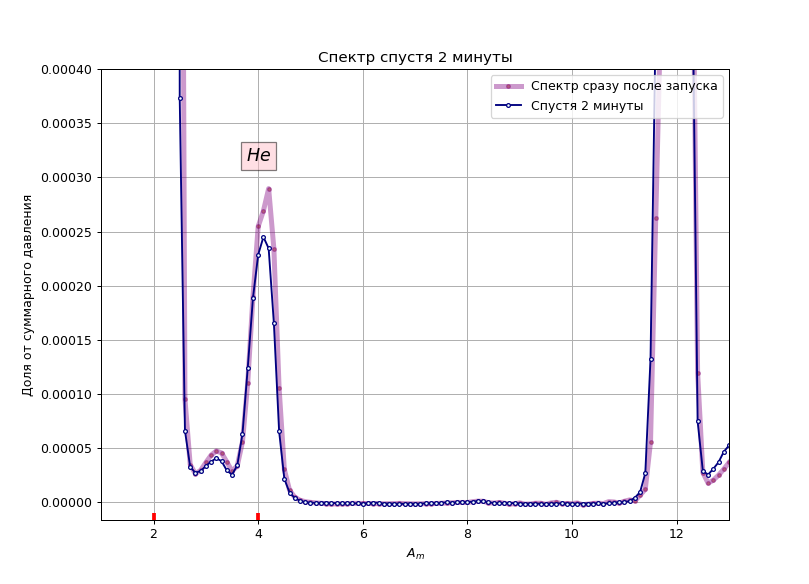

In [268]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_helium_1[0], data_helium_1[1] / np.sum(data_helium_1[1]), 
        linestyle = "-",     marker = ".", color = 'purple', markerfacecolor = "darkred", 
        linewidth=4, alpha=0.4, label='Спектр сразу после запуска')
ax.plot(data_helium_2[0], data_helium_2[1] / np.sum(data_helium_2[1]),
        linestyle = "-",     marker = ".", color = 'navy', markerfacecolor = "azure", 
        label='Спустя 2 минуты')

plt.title('Спектр спустя 2 минуты')
plt.ylabel(r'Доля от суммарного давления')
plt.xlabel(r'$A_m$')

# Создаем экземпляр класса, который будет отвечать за расположение меток 
# Метки будут находиться только в тех значениях, которые перечислены в списке(интересные соединения)
locator = matplotlib.ticker.FixedLocator ([28, 32, 18, 44, 20, 16, 4, 2, 18])
# Установим локатор для вспомогательных и относительных меток
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(locator)

#установка параметров засечек
ax.tick_params(which='minor', width=3, length=6, color='r', direction='in')

ax.set_xlim([1, 13])
ax.set_ylim([-1.6e-05,0.0004])

ax.grid()


# Текст в рамке

plt.text(4, 0.00032, r'$He$', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))

plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('heliim_0.pdf', dpi=300)

### Исследование процесса релаксации долей давления в сосуде
На этом этапе был произведен замер зависимости парциального давления в объёме от времени для 3 позиций:
* Азот $N_2$
* Гелий $He$
* Водород $H_2$

In [13]:
#Динамика спектра, извлечение данных
data_dinamic = np.transpose(np.loadtxt(r"C:\Users\maxkway\Desktop\Labaratory\Massspectrum\data\time_test_gettingout.txt",
                                        delimiter= '\t',skiprows=26))

Ниже представлен график зависимостей парциальных давлений от времени

<IPython.core.display.Javascript object>


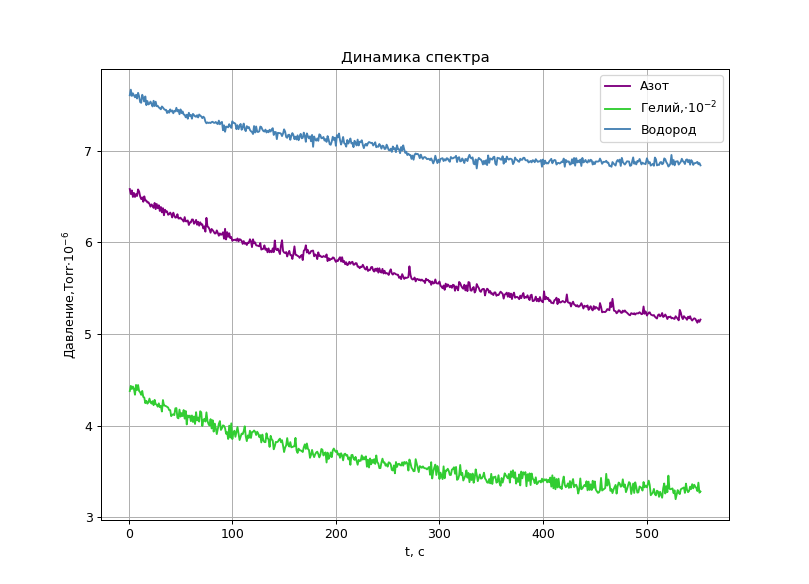

In [286]:
%matplotlib notebook


ax.plot(data_dinamic[0], data_dinamic[1]*1e06, color = 'purple', label='Азот')
ax.plot(data_dinamic[0], data_dinamic[2]*1e08, linestyle = "-", color = 'limegreen', label=r'Гелий,$\cdot 10^{-2}$')
ax.plot(data_dinamic[0], data_dinamic[3]*1e06, linestyle = "-", color = 'steelblue', label='Водород')

plt.title('Динамика спектра')
plt.ylabel(r'Давление,Torr$\cdot 10^{-6}$')
plt.xlabel(r't, c')


#ax.set_xlim([1, 13])
#ax.set_ylim([-1.6e-05,0.0004])

ax.grid()


# Текст в рамке



plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('dinamic.pdf', dpi=300)

Теперь построим относительное изменение концентрации от времени.

<IPython.core.display.Javascript object>


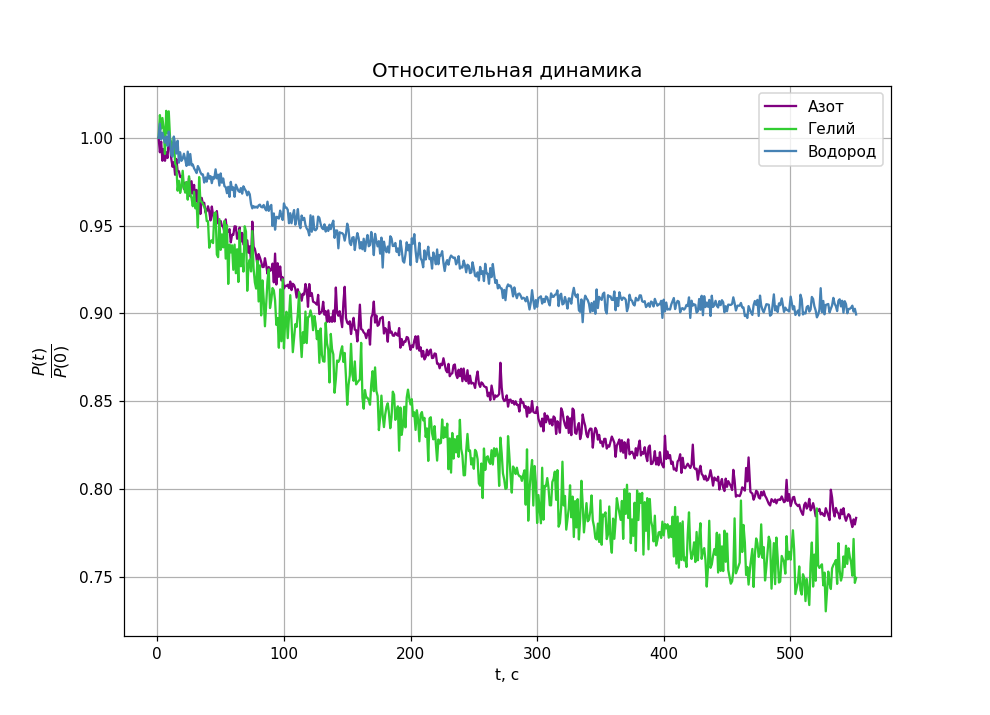

In [294]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_dinamic[0], data_dinamic[1]/data_dinamic[1][0], color = 'purple',    label='Азот')
ax.plot(data_dinamic[0], data_dinamic[2]/data_dinamic[2][0], color = 'limegreen', label=r'Гелий')
ax.plot(data_dinamic[0], data_dinamic[3]/data_dinamic[3][0], color = 'steelblue', label='Водород')

plt.title('Относительная динамика', fontsize=13)
plt.ylabel(r'$\frac{P(t)}{P(0)}$', fontsize=15)
plt.xlabel(r't, c')


#ax.set_xlim([1, 13])
#ax.set_ylim([-1.6e-05,0.0004])

ax.grid()


# Текст в рамке



plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('dinamic_norm.pdf', dpi=300)

##### Теперь построим в логифмической шкале те же данные для определения скорости релаксации.

<IPython.core.display.Javascript object>


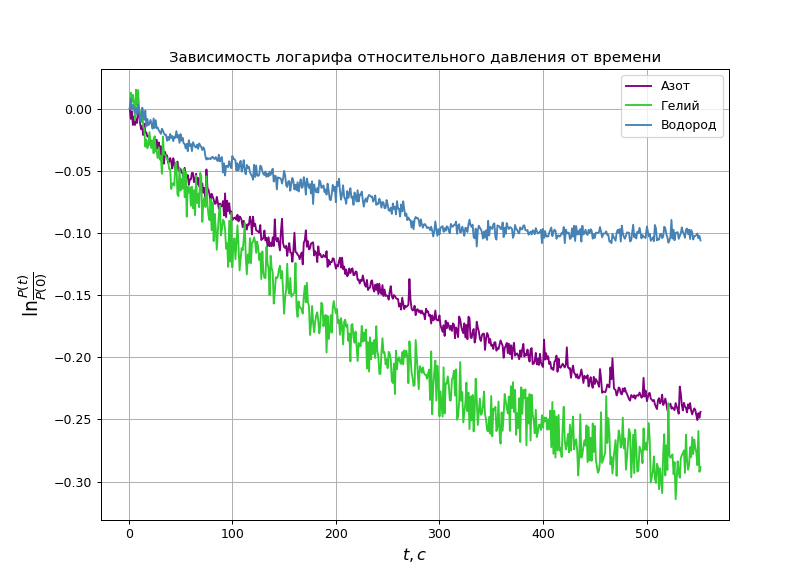

In [14]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(data_dinamic[0], np.log(data_dinamic[1]/data_dinamic[1][0]), color = 'purple',    label='Азот')
ax.plot(data_dinamic[0], np.log(data_dinamic[2]/data_dinamic[2][0]), color = 'limegreen', label=r'Гелий')
ax.plot(data_dinamic[0], np.log(data_dinamic[3]/data_dinamic[3][0]), color = 'steelblue', label='Водород')

plt.title('Зависимость логарифа относительного давления от времени')
plt.ylabel(r'$\ln{\frac{P(t)}{P(0)}}$',fontsize=15)
plt.xlabel(r'$t, c$',fontsize=13)


#ax.set_xlim([1, 13])
#ax.set_ylim([-1.6e-05,0.0004])

ax.grid()


# Текст в рамке



plt.legend(loc='upper right')
fig.set_size_inches(9, 6.5)
fig.savefig('dinamic_norm.pdf', dpi=300)

Сравнение с данными производителя 
<a href="http://blms.ru/hipace10_800"><img src="http://blms.ru/d/39511/d/3696266441_7.jpg" alt="getting_out" border="0"></a>
* $N_2$ - чёрная кривая
* $He$ - <span style="color: #0000ff;">Синия кривая </span>
* $H_2$ - <span style="color:#ff0000">Красная кривая</span>

Замечаем, что:
* Скорость откачки водорода в 1.5 раза меньше гелия
* Скорость откачки Гелия и Азота действительно отличаются не более чем на 20%


## Выводы
* Был произведен замер спектра воздуха, он содержит интересные пики, которые были качественно исследованы
* Неона в сосуде не окозалось, ровно как и гелия при первом напуске
* Добавление гелия несколько качественно поменяло картину спектра
* Произведено наблюдение за динамическим развитием давлений в объёме и проведено сравнение с данными производителя


### Использованная литература:
<p><a href="http://journals.ioffe.ru/articles/viewPDF/9238">Исследование состава смеси паров воды с аргоном методом масс-спектрометрии сверхзвукового молекулярного пучка</a></p>
<p><a href="https://www.litres.ru/aleksandr-berkin/fizicheskie-osnovy-vakuumnoy-tehniki-32500334/">А.Б. Беркин, Физические основы вакуумной техники, НГТУ.2014</a></p>

<p><img alt="Мишенька" src="https://i.ibb.co/FVd3wjv/kek.jpg" style="width:200px" /></p>